# Explore here

In [8]:
#Los IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [9]:
#Importar data y convertirla a CSV
url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"
pd.read_csv(url, sep= ";", encoding= "utf-8", quotechar='"').to_csv("../data/raw/bank-marketing-campaign-data.csv", index=False)


In [10]:
#Cargar el dataset
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv")

In [11]:
#Mostrar las primeras 5 lineas del DataFrame
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
#Revisión duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Existen {num_duplicados} duplicados en el DataFrame")

Existen 12 duplicados en el DataFrame


In [13]:
#Resumen completo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Glosario básico

pdays: Días desde el último contacto previo
previus: Número de contactos previos realizados antes de esta campaña
poutcome: Resultado de la campaña anterior
emp.var.rate: Tasa de variación del empleo / (positivo = sube empleo, negativo = baja)
cons.price.idx: Índice de precios al consumidor (IPC)
cons.conf.idx: Índice de confianza del consumidor
euribor3m: Euribor a 3 meses
y: Se contrata o no el depósito

En la distribución que se ofrece el dataset, hay 10 categorias que son númericas (int64 y float64) y 11 que son del tipo "object"

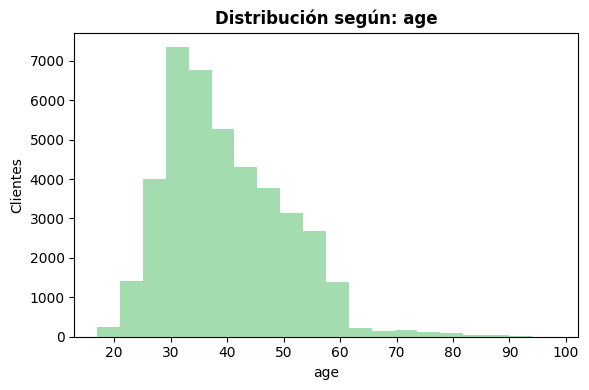

--- age ---
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64




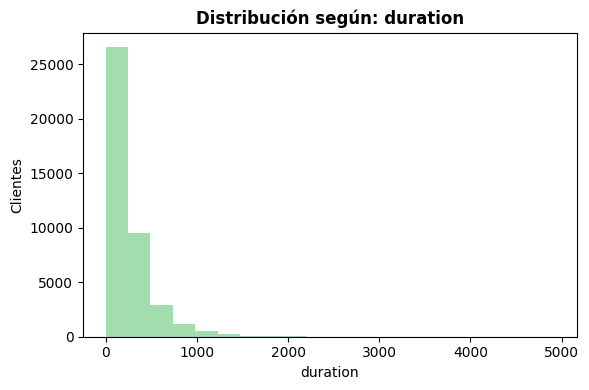

--- duration ---
duration
85      170
90      170
136     168
73      167
124     164
       ... 
1356      1
1103      1
1992      1
3183      1
1399      1
Name: count, Length: 1544, dtype: int64




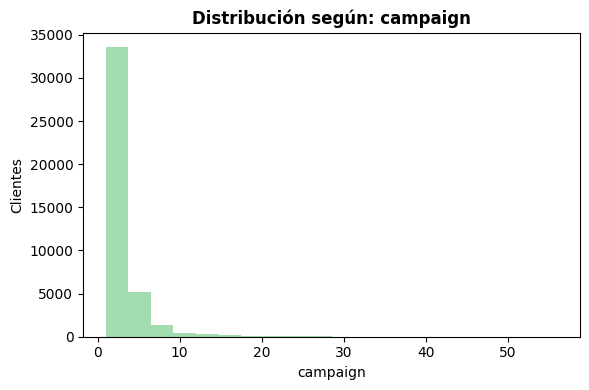

--- campaign ---
campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
40        2
42        2
39        1
56        1
37        1
41        1
Name: count, dtype: int64




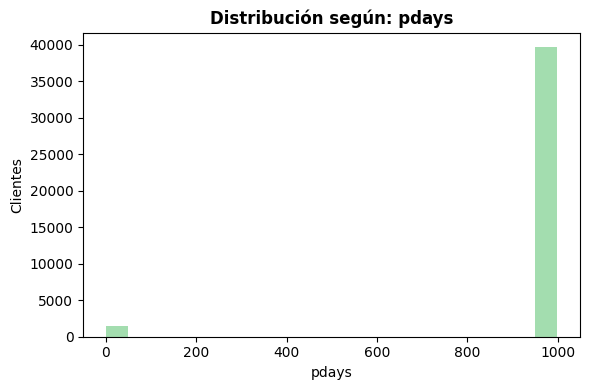

--- pdays ---
pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64




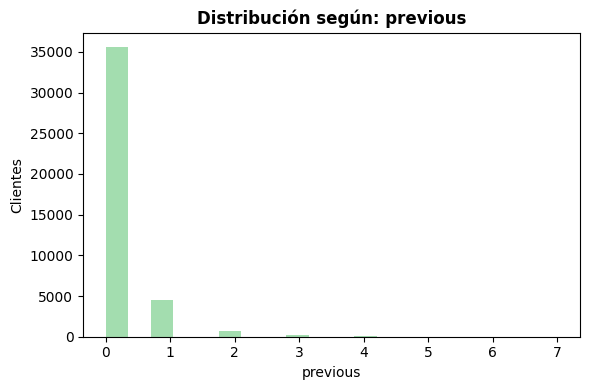

--- previous ---
previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64




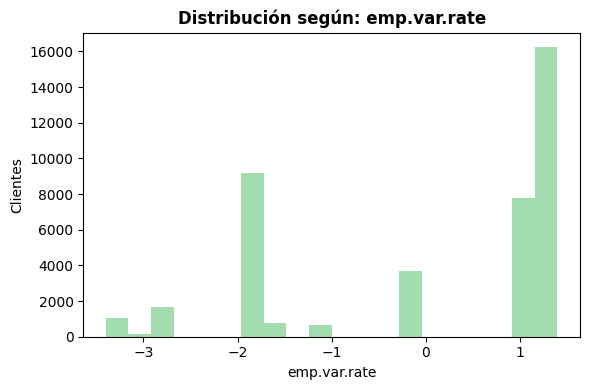

--- emp.var.rate ---
emp.var.rate
 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64




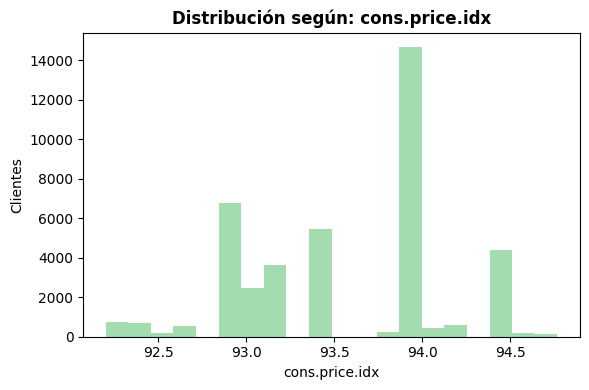

--- cons.price.idx ---
cons.price.idx
93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64




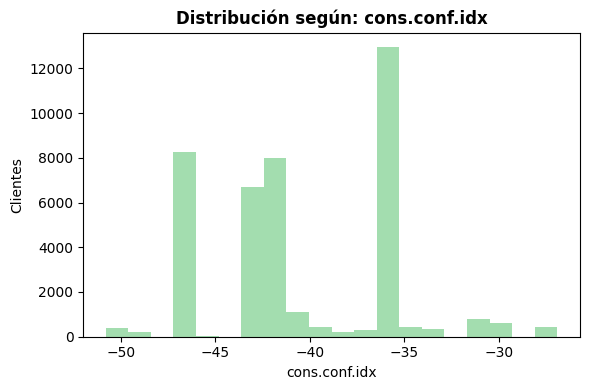

--- cons.conf.idx ---
cons.conf.idx
-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: count, dtype: int64




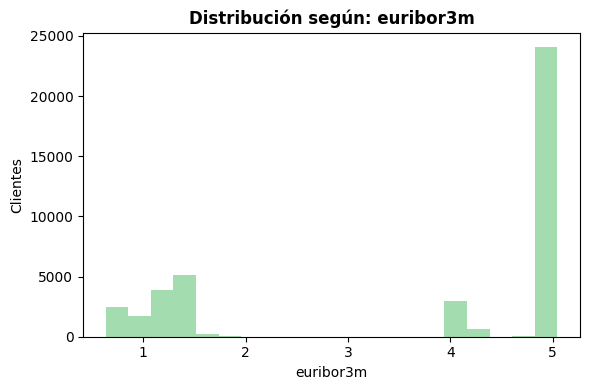

--- euribor3m ---
euribor3m
4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.816       1
3.428       1
3.329       1
1.045       1
1.047       1
Name: count, Length: 316, dtype: int64




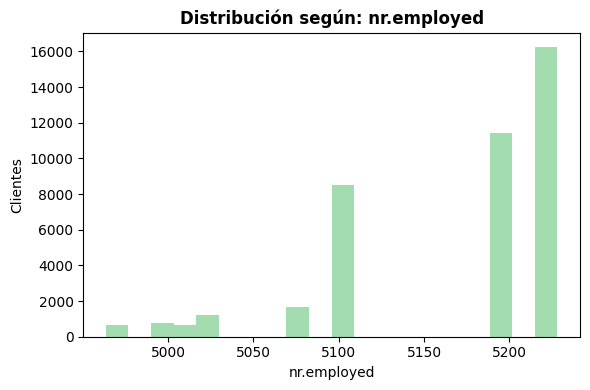

--- nr.employed ---
nr.employed
5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64




In [14]:
#Separamos los valores que son del tipo -numérico- para visualizar su distribución
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color="#7CCF8E", alpha=0.7)
    plt.title(f"Distribución según: {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col)
    plt.ylabel("Clientes")
    plt.tight_layout()
    plt.show()
        
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

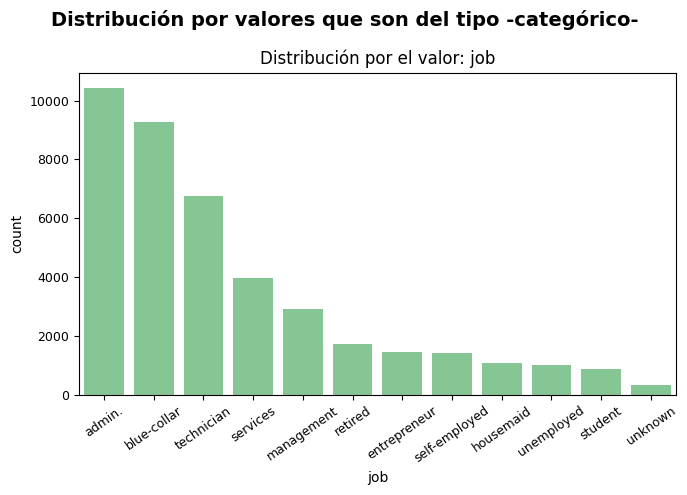

--- job ---
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64




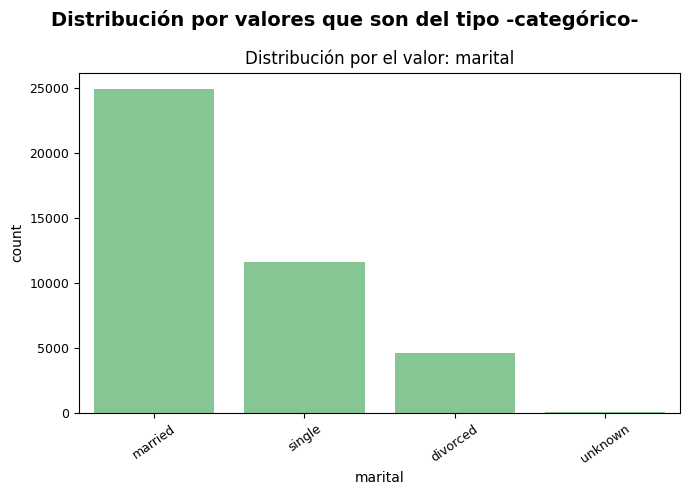

--- marital ---
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64




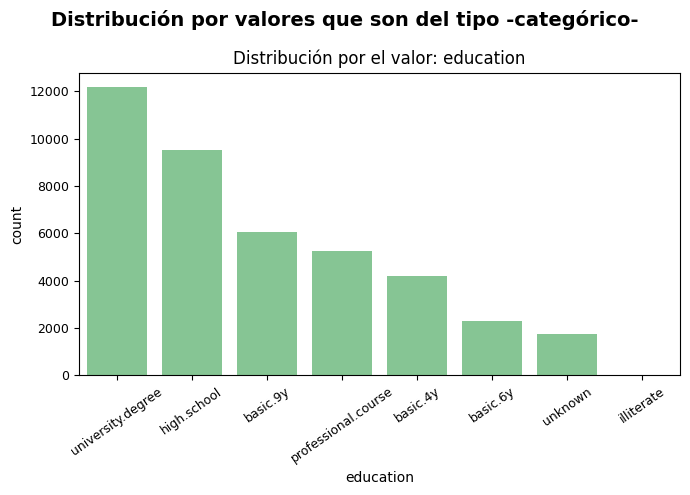

--- education ---
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64




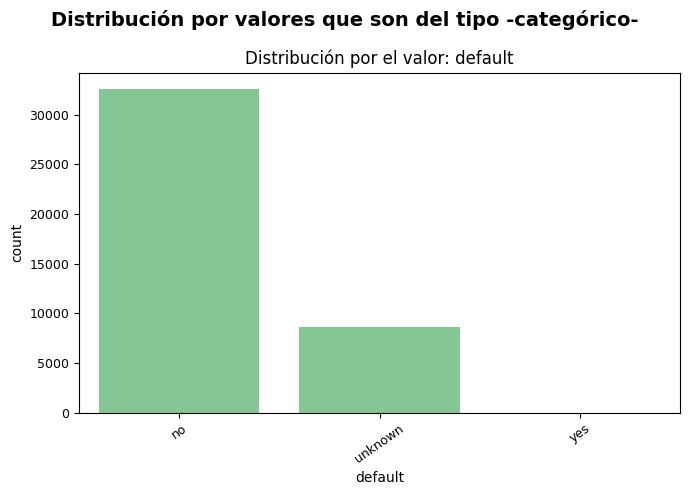

--- default ---
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64




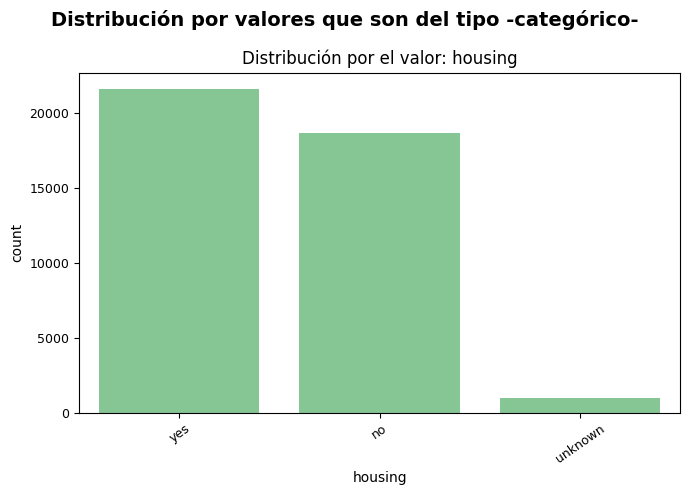

--- housing ---
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64




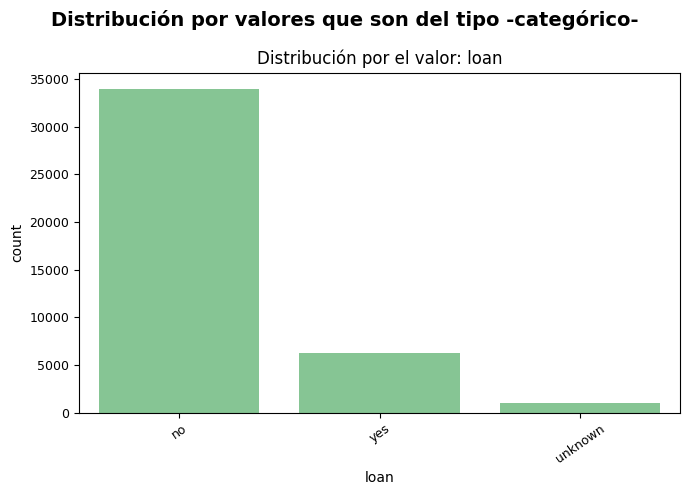

--- loan ---
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64




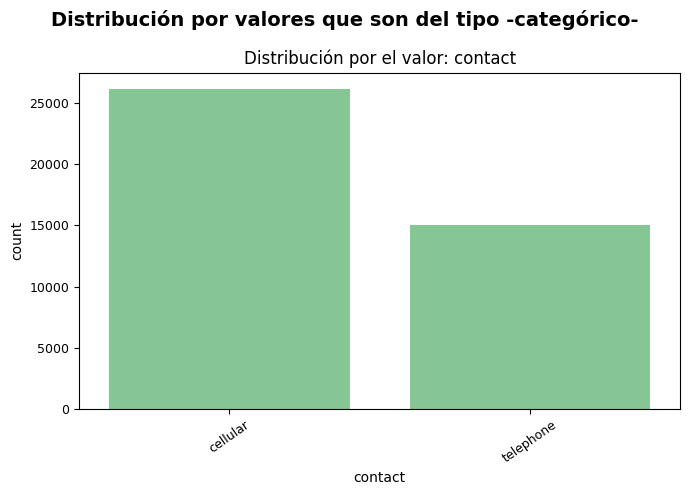

--- contact ---
contact
cellular     26144
telephone    15044
Name: count, dtype: int64




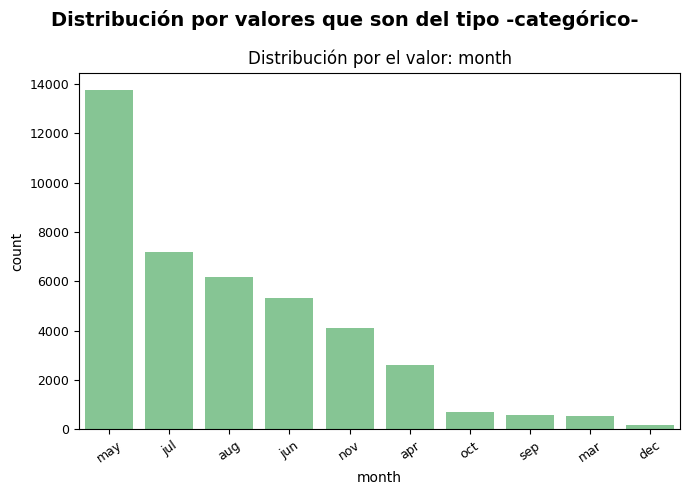

--- month ---
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64




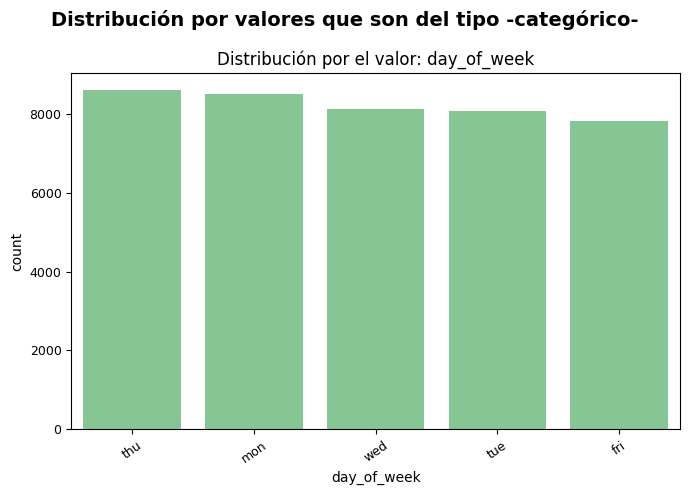

--- day_of_week ---
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64




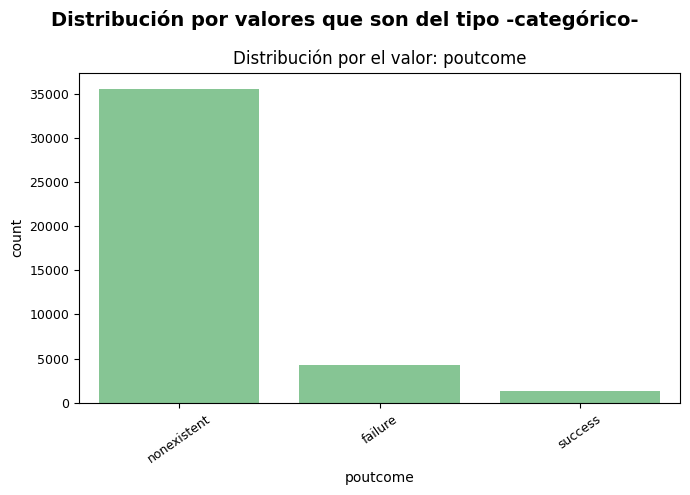

--- poutcome ---
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64




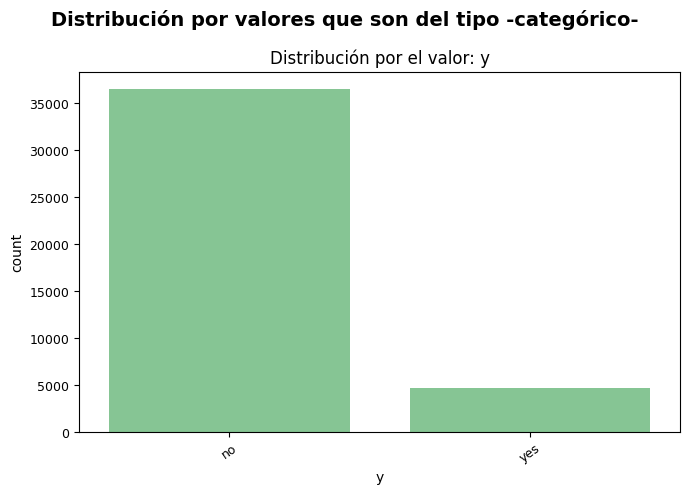

--- y ---
y
no     36548
yes     4640
Name: count, dtype: int64




In [15]:
#Separamos los valores que son del tipo -categórico- para visualizar su distribución
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, color="#7CCF8E")
    plt.suptitle("Distribución por valores que son del tipo -categórico-", fontsize=14, fontweight="bold")
    plt.title(f"Distribución por el valor: {col}", fontsize=12)
    plt.xticks(rotation=35, fontsize=9)
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()
    
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

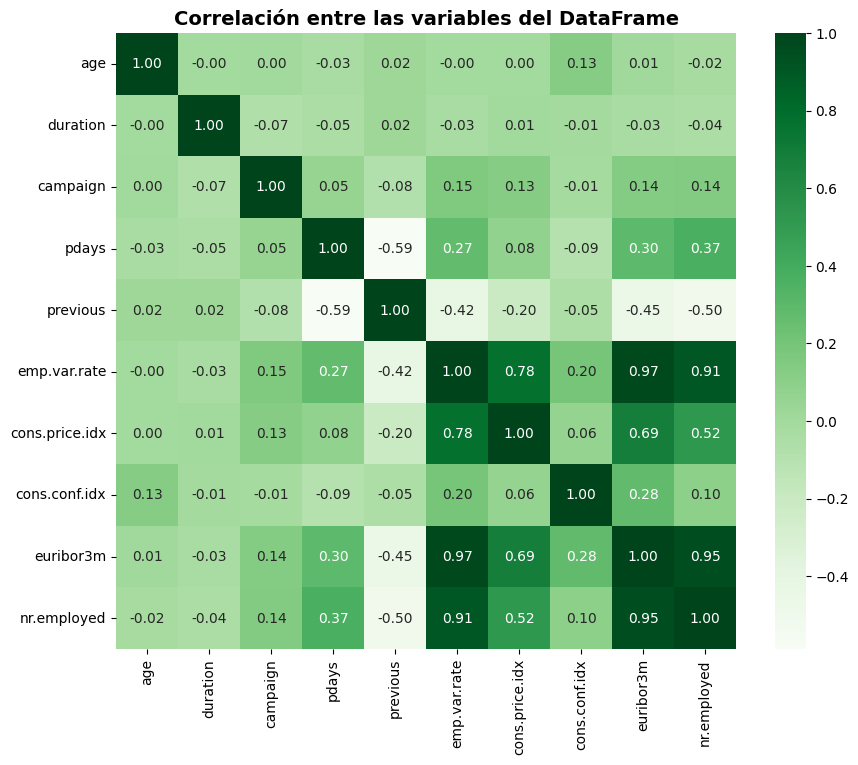

In [16]:
#Mapa de calor para buscar correlaciones entre las categorias
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlación entre las variables del DataFrame", fontsize=14, fontweight="bold")
plt.show()

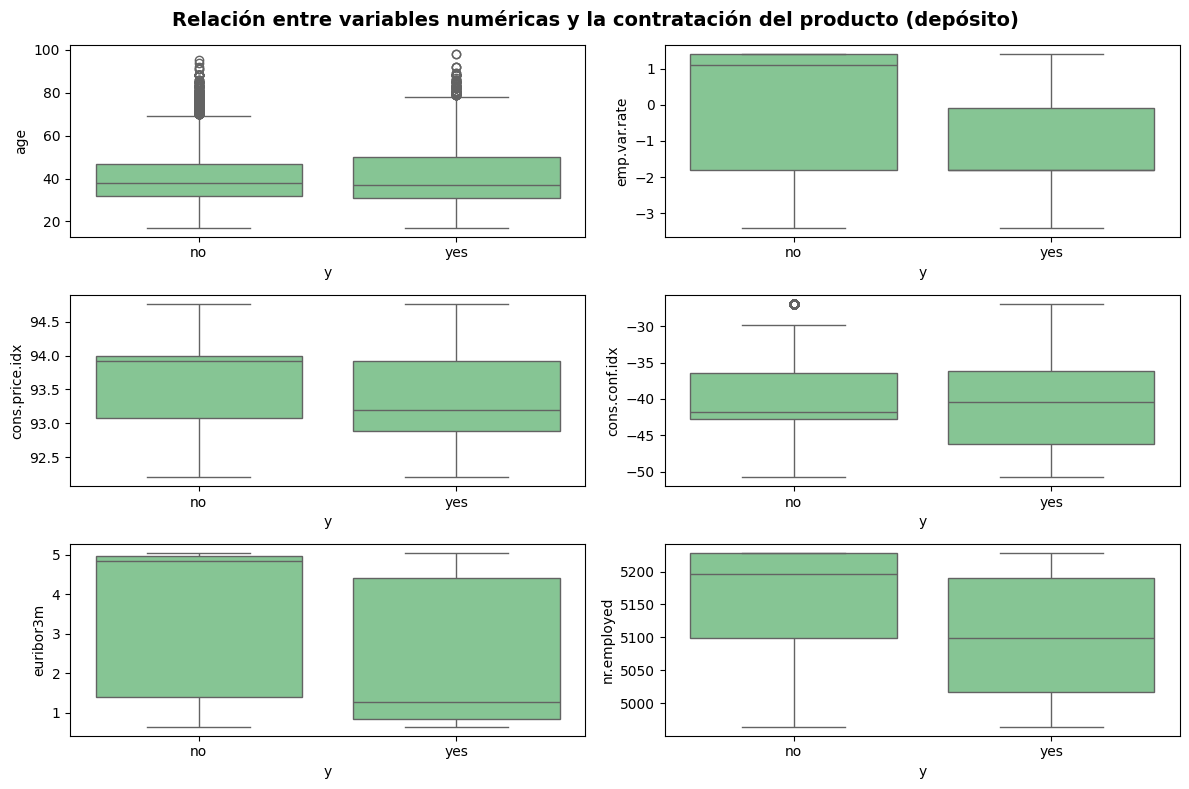

In [17]:
# Relación entre variables numéricas al "Sí" en la contratación del producto (deposito)
variables = ["age", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"] 
fig, axes = plt.subplots(3, 2, figsize=(12, 8)) 
axes = axes.flatten()
for i, col in enumerate(variables):
    sns.boxplot(data=df, x="y", y=col, ax=axes[i], color="#7CCF8E")
    fig.suptitle("Relación entre variables numéricas y la contratación del producto (depósito)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()


En los gráficos se puede observar como se comportan cada uno de los casos a estudiar, por ejemplo, en el de edad con la posibilidad de contratación del depósito podemos ver son datos que podrían ser similares, no siendo la edad una variable que apunte a que a cierta edad se tenga más decante por contratar, sin embargo, en casos como "nr.employed", vemos como todo lo que está arriba de 5k es un no, sin embargo, en los si, aquellos que tienen menor a 5k tienden a un si, puesto que a mayor estabilidad menor necesidad de buscar la contratación de un depósito, y ante mayor inestabilidad se busca seguridad en un depósito o producto de ahorro.

Según los datos que se dan , el euribor a 3 meses, es casi estable, si fuese bajo habría mas casos de si y si subiese el euribor sería más un no, por ello se ve muy "equilibrado", no obstante, en los datos se veía uno que tenía un 1,57... podría ser un error al estar lejano de la media de euribor que muestra el dataset.

Por otro lado, en el caso de emp.var.rate, vemos que, a mayor estabilidad en empleo las personas podrían optar por no contratar (salvo que asi lo desean pero no es algo que "busquen" tomamos 0 como estable y en numero positivos con empleo y mejora, y aquellos que estén por debajo del 0 con una inestabilidad en el trabajo, y justo este grupo son los que contratan...


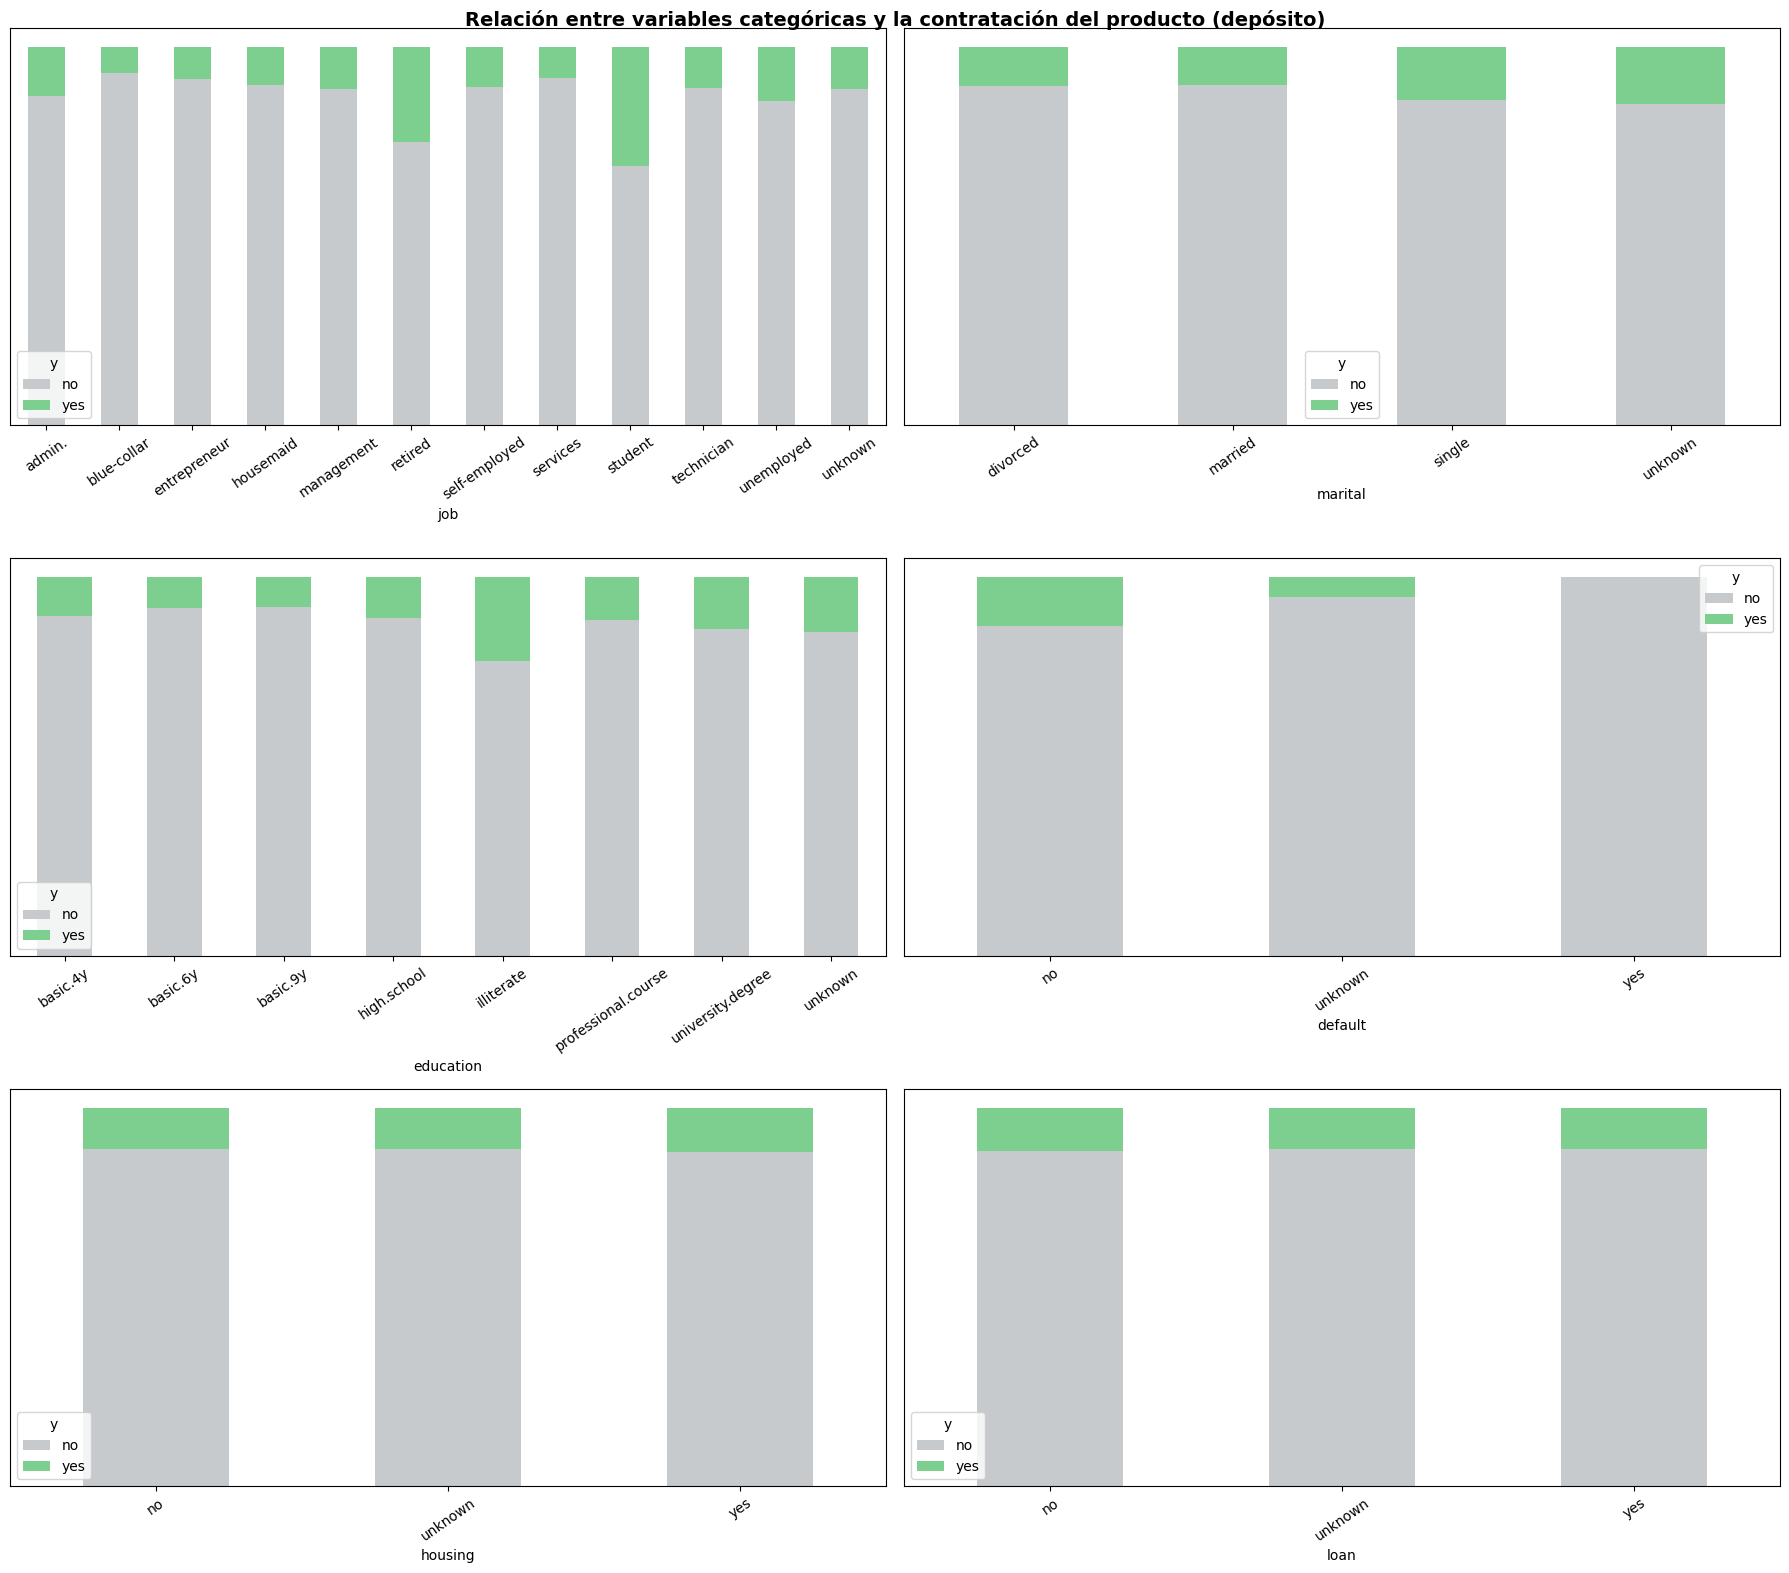

In [18]:
# Relación entre variables categóricas al "Sí" en la contratación del producto (deposito)
variables_cat = ["job", "marital", "education", "default", "housing", "loan"]
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(variables_cat):
    ct = pd.crosstab(df[col], df["y"], normalize="index")
    ct.plot(kind="bar", stacked=True, ax=axes[i], color=["#C6CACC", "#7CCF8E"])
    fig.suptitle("Relación entre variables categóricas y la contratación del producto (depósito)", fontsize=14, fontweight="bold") 
    axes[i].legend(title="y")
    axes[i].set_ylabel("")
    axes[i].set_yticks([])
    axes[i].tick_params(axis="x", rotation=35)

if len(variables_cat) < len(axes):
    for j in range(len(variables_cat), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [24]:
#Correlación entre el tiempo de la llamada con la contratación
df["y_num"] = df["y"].map({"no": 0, "yes": 1})  #Al ser "object" le damos un valor 0 y 1 para que se pueda realizar una correlación con "duration"
duration = df["duration"].corr(df["y_num"])
print(f"La correlación entre duración de la llamada y la contratación es de: {corr_duration:.2f}")


La correlación entre duración de la llamada y la contratación es de: 0.41


/tmp/ipykernel_2736/42725762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y="duration", data=df, palette=["#C6CACC", "#7CCF8E"])


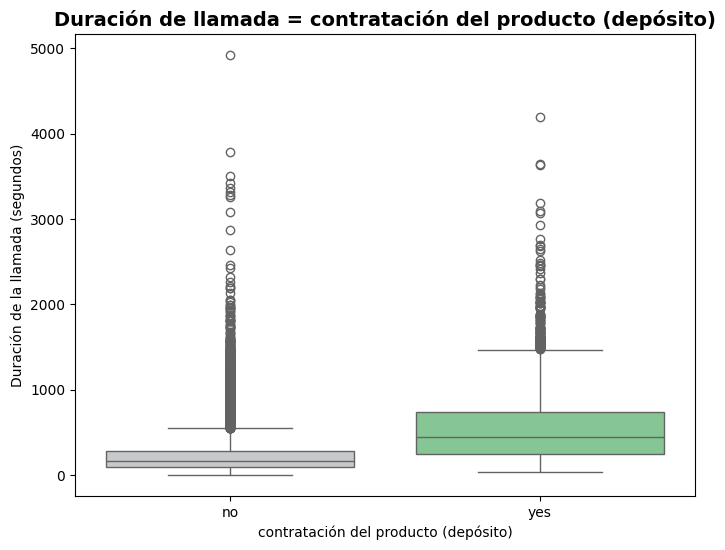

In [25]:
#Graficamos la correlación entre el tiempo de la llamada con la contratación
plt.figure(figsize=(8,6))
sns.boxplot(x="y", y="duration", data=df, palette=["#C6CACC", "#7CCF8E"])
plt.title("Duración de llamada = contratación del producto (depósito)", fontsize=14, fontweight="bold")
plt.xlabel("contratación del producto (depósito)")
plt.ylabel("Duración de la llamada (segundos)")
plt.show()


Según lo que vemos en esta última parte del análisis, coincide que, a mayor en la llamada hay más posibilidad de contratar el depósito, siendo que a menor tiempo, no hay interés y por ello no se termina contratando.

In [29]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [30]:
#Preparamos modelo
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop("y_yes", axis=1)
y = df_encoded["y_yes"]

num_cols = X.select_dtypes(include="number").columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [31]:
#Dividimos los datos para el train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [32]:
#Creación del modelo de regresión
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
#Predicciones del modelo en el conjunto "test"
y_pred = model.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False], shape=(16476,))

In [34]:
#Medición de probabilidad en el modelo
model.predict_proba(X_test)

array([[9.99859674e-01, 1.40325905e-04],
       [9.99530834e-01, 4.69165602e-04],
       [9.99883840e-01, 1.16159860e-04],
       ...,
       [9.99652455e-01, 3.47545426e-04],
       [9.99865866e-01, 1.34134099e-04],
       [9.99807852e-01, 1.92148269e-04]], shape=(16476, 2))

In [35]:
#Medimos la exactitud del modelo
accuracy_score(y_test, y_pred)


1.0

In [ ]:
#Medimos la precisión del modelo
precision_score(y_test, y_pred)


1.0

In [ ]:
#Cálculo de sensibilidad (verdaderos positivos)
recall_score(y_test, y_pred)


1.0

In [ ]:
#Combina precisión + recall
f1_score(y_test, y_pred)


1.0

In [ ]:
#Creación de matríx de condusión
conf_matx = confusion_matrix(y_test, y_pred)
conf_matx

array([[14620,     0],
       [    0,  1856]])

veo un error no puede ser 0, algo no está bien, además me sale todo en 1... no me lo creo...

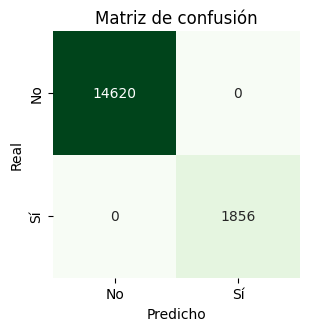

In [ ]:
#Creación de mapa de calor
confmax_df = pd.DataFrame(conf_matx, index=["No","Sí"], columns=["No","Sí"])
plt.figure(figsize = (3, 3))
sns.heatmap(confmax_df, annot=True, fmt="d", cbar=False, cmap="Greens")

plt.tight_layout()

plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

In [ ]:
#Preparar para la optimización de los hiperparámetros
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

#Creación dekl grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [ ]:
#Silenciar las advertencias
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
#Entrenamiento de busqueda de hiperparámetros para mejorar la combinación
grid.fit(X_train, y_train)
print(f"Los mejores hiperparámetros son: {grid.best_params_}")

Los mejores hiperparámetros son: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
#Examinación del modelo
model_random_search = LogisticRegression(penalty = "l1", C = 0.001, solver = "liblinear")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)
random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_precision = precision_score(y_test, y_pred)
random_search_reccal = recall_score(y_test, y_pred)
random_search_f1 = f1_score(y_test, y_pred)

print(f"Exactitud: {random_search_accuracy}")
print(f"Presición:{random_search_precision}")
print(f"Recall: {random_search_reccal}")
print(f"F1 Score: {random_search_f1}")

Exactitud: 1.0
Presición:1.0
Recall: 1.0
F1 Score: 1.0


Esto no puede ser correcto, no puede ser un 1 exacto, debí equivocarme...